In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas_profiling as pp 
import sweetviz as sv 

# Exploratory data analysis

In [4]:
bank=pd.read_csv("bankruptcy-prevention.csv",sep=";")
labelencoder=preprocessing.LabelEncoder()
bank[" class"]=labelencoder.fit_transform(bank[" class"])
bank

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


In [5]:
bank.tail(10)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
240,0.0,1.0,0.5,0.5,0.5,0.0,1
241,1.0,0.0,0.5,0.5,0.5,1.0,1
242,0.0,1.0,0.5,0.5,0.5,1.0,1
243,0.0,1.0,1.0,1.0,1.0,0.0,1
244,1.0,0.0,1.0,1.0,1.0,1.0,1
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1
249,1.0,0.0,0.5,0.5,1.0,1.0,1


In [6]:
bank.head(20)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
5,1.0,1.0,0.0,0.5,0.0,0.5,0
6,1.0,1.0,0.0,0.0,0.0,0.0,0
7,1.0,1.0,0.0,0.0,0.0,0.5,0
8,1.0,1.0,0.0,0.5,0.0,0.0,0
9,1.0,1.0,0.0,0.5,0.0,1.0,0


In [7]:
bank.shape

(250, 7)

In [8]:
bank.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')

In [9]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    int32  
dtypes: float64(6), int32(1)
memory usage: 12.8 KB


In [10]:
bank.dtypes

industrial_risk           float64
 management_risk          float64
 financial_flexibility    float64
 credibility              float64
 competitiveness          float64
 operating_risk           float64
 class                      int32
dtype: object

In [11]:
bank[bank.duplicated()].shape 

(147, 7)

In [12]:
plt.hist(bank['industrial_risk'])

(array([80.,  0.,  0.,  0.,  0., 81.,  0.,  0.,  0., 89.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

In [13]:
plt.boxplot(bank['industrial_risk'])

{'whiskers': [<matplotlib.lines.Line2D at 0x3d65e9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x3d65efa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x3d65e730>],
 'medians': [<matplotlib.lines.Line2D at 0x3d66d6a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x3d66d9d0>],
 'means': []}

In [14]:
bank.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000,0.572000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575,0.495781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
bank.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [16]:
import seaborn as sns
sns.pairplot(bank)

In [17]:
import seaborn as sns
cols = bank.columns 
colours = ['#000099', '#ffff00']
sns.heatmap(bank[cols].isnull(),
            cmap=sns.color_palette(colours)) 

<AxesSubplot:label='090ce029-4c4a-4fda-943b-50eca3798cf5'>

In [18]:
bank.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


In [19]:
sweet_report = sv.analyze(bank)
sweet_report.show_html('fraudcheck.html')  

                                             |          | [  0%]   00:00 -> (? left)

Report fraudcheck.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Model building

In [20]:
x=bank.iloc[:,[0,1,2,3,4,5]] 
y=bank.iloc[:,6]

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.32,random_state=40)

# Logistic regresion

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [23]:
classifier.coef_

array([[-0.55226799, -0.82926641,  2.33254177,  2.13806006,  3.57064533,
        -0.47416656]])

In [24]:
classifier.predict_proba(x_train)

array([[0.92764037, 0.07235963],
       [0.04254277, 0.95745723],
       [0.94927397, 0.05072603],
       [0.96716717, 0.03283283],
       [0.33160821, 0.66839179],
       [0.00187565, 0.99812435],
       [0.41144318, 0.58855682],
       [0.18699916, 0.81300084],
       [0.01445931, 0.98554069],
       [0.95874524, 0.04125476],
       [0.94217442, 0.05782558],
       [0.03732463, 0.96267537],
       [0.92093301, 0.07906699],
       [0.92083559, 0.07916441],
       [0.0762292 , 0.9237708 ],
       [0.06694693, 0.93305307],
       [0.06957064, 0.93042936],
       [0.91002271, 0.08997729],
       [0.92764037, 0.07235963],
       [0.00599598, 0.99400402],
       [0.00599598, 0.99400402],
       [0.91002271, 0.08997729],
       [0.95717271, 0.04282729],
       [0.80931959, 0.19068041],
       [0.73988128, 0.26011872],
       [0.97391657, 0.02608343],
       [0.04525224, 0.95474776],
       [0.05169316, 0.94830684],
       [0.97391657, 0.02608343],
       [0.95554301, 0.04445699],
       [0.

In [25]:
y_pred1=classifier.predict(x_train)
y_pred1

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [26]:
y_pred2=classifier.predict(x_test)
y_pred2

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0])

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train,y_pred1)
print (confusion_matrix) 


[[79  1]
 [ 0 90]]


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred2)
print (confusion_matrix) 


[[27  0]
 [ 0 53]]


In [29]:
train_accuracy = sum(y_train==y_pred1)/170
train_accuracy

0.9941176470588236

In [30]:
test_accuracy = sum(y_test==y_pred2)/80
test_accuracy 

1.0

In [31]:
print (classification_report (y_train, y_pred1))  

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        80
           1       0.99      1.00      0.99        90

    accuracy                           0.99       170
   macro avg       0.99      0.99      0.99       170
weighted avg       0.99      0.99      0.99       170



In [32]:
 print (classification_report (y_test, y_pred2))  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        53

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [33]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(y_train,classifier.predict(x_train))
Logit_roc_score  

0.99375

In [34]:
Logit_roc_score=roc_auc_score(y_test,classifier.predict(x_test))
Logit_roc_score  

1.0

In [35]:
fpr, tpr, thresholds = roc_curve(y_test,classifier.predict_proba(x_test)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()   

<ipython-input-35-85ad1a712cad>:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [36]:
import statsmodels.api as sm
logit=sm.Logit(y,x)
logit.fit().summary()

         Current function value: 0.000002
         Iterations: 35


D:\jup\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                  250
Model:                          Logit   Df Residuals:                      244
Method:                           MLE   Df Model:                            5
Date:                Thu, 02 Dec 2021   Pseudo R-squ.:                   1.000
Time:                        15:02:23   Log-Likelihood:            -0.00058593
converged:                      False   LL-Null:                       -170.69
Covariance Type:            nonrobust   LLR p-value:                 1.261e-71
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
industrial_risk           12.9189   2950.738      0.004      0.997   -5770.421    5796.258
 management_risk        -324.2668    5.3e+05     -0.001      1.000   -1.04e+06    1.04e+06
 financial_flexibility   145.4967   2.84e+05      0.001      1.000   -5.56e+05    5.56e+05
 credibility             -30.6519   7.78e+04     -0.000      1.000   -1.53e+05    1.52e+05
 competitiveness         620.7475   8.52e+05      0.001      0.999   -1.67e+06    1.67e+06
 operating_risk          -21.7483   2949.871     -0.007      0.994   -5803.389    5759.892
==========================================================================================

Possibly complete quasi-separation: A fraction 0.98 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# Decision trees

In [37]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [38]:
tree.plot_tree(model);

In [39]:
preds1 = model.predict(x_train) 
pd.Series(preds1).value_counts()  

1    94
0    76
dtype: int64

In [40]:
train_accuracy = sum(y_train==preds1)/170
train_accuracy 

0.9764705882352941

In [41]:
preds2= model.predict(x_test) 
pd.Series(preds2).value_counts()  

1    53
0    27
dtype: int64

In [42]:
test_accuracy = sum(y_test==preds2)/80
test_accuracy 

1.0

In [43]:
pd.crosstab(y_test,preds2) 

col_0,0,1
class,,
0,27,0
1,0,53


In [44]:
pd.crosstab(y_train,preds1) 

col_0,0,1
class,,
0,76,4
1,0,90


# Support vector machines

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import accuracy_score

In [46]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[33,50,4,10,0.5],'C':[15,14,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 11, 10, 0.1, 0.001],
                          'gamma': [33, 50, 4, 10, 0.5], 'kernel': ['rbf']}])

In [47]:
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'gamma': 4, 'kernel': 'rbf'}, 0.9941176470588236)

In [48]:
clf=SVC(C=0.1,gamma=10,kernel='rbf')
clf.fit(x_train,y_train)
y_pred=clf.predict(x_train)
acc=accuracy_score(y_train,y_pred)*100
print("Accuracy=",acc)
print(pd.crosstab(y_train,y_pred))
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
print(pd.crosstab(y_pred,y_test))

Accuracy= 61.76470588235294
col_0    0   1
 class        
0       15  65
1        0  90
Accuracy = 71.25
 class   0   1
row_0         
0        4   0
1       23  53


In [49]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_train)
acc = accuracy_score(y_train, y_pred) * 100
print("Accuracy =", acc)
print(pd.crosstab(y_pred,y_train))
#didnt use any kernel because the accuracy is already high
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
print(pd.crosstab(y_pred,y_test))

Accuracy = 100.0
 class   0   1
row_0         
0       80   0
1        0  90
Accuracy = 100.0
 class   0   1
row_0         
0       27   0
1        0  53


# Naive bayes

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train,y_train)
print(clf.score(x_train,y_train))
y_pred1 = clf.predict(x_train)
print(y_pred1)
print(classification_report(y_train, y_pred1))

0.9705882352941176
[0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1
 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1
 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1
 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0
 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        80
           1       0.95      1.00      0.97        90

    accuracy                           0.97       170
   macro avg       0.97      0.97      0.97       170
weighted avg       0.97      0.97      0.97       170



In [51]:
print(clf.score(x_test,y_test))
y_pred1 = clf.predict(x_train)
print(y_pred1)
print(classification_report(y_train, y_pred1))

1.0
[0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1
 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1
 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1
 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0
 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        80
           1       0.95      1.00      0.97        90

    accuracy                           0.97       170
   macro avg       0.97      0.97      0.97       170
weighted avg       0.97      0.97      0.97       170



# Neural networks

In [52]:
import tensorflow.compat.v2 as tv
import tensorflow as tf
from tensorflow import keras 

In [53]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import regularizers
seed = 7
np.random.seed(seed)
model = Sequential()
model.add(Dense(8, input_dim=6, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(5,  activation='relu'))
model.add(Dense(1,  activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc']) 
history=model.fit(x_train, y_train, validation_split=0.20, epochs=50, batch_size=10,verbose=1) 
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 

Epoch 1/50
14/14 [==============================] - 2s 54ms/step - loss: 0.7474 - acc: 0.6029 - val_loss: 0.7317 - val_acc: 0.7647
Epoch 2/50
14/14 [==============================] - 0s 3ms/step - loss: 0.7305 - acc: 0.7059 - val_loss: 0.7133 - val_acc: 0.7941
Epoch 3/50
14/14 [==============================] - 0s 3ms/step - loss: 0.7120 - acc: 0.7721 - val_loss: 0.6940 - val_acc: 0.8529
Epoch 4/50
14/14 [==============================] - 0s 3ms/step - loss: 0.6916 - acc: 0.8235 - val_loss: 0.6729 - val_acc: 0.8824
Epoch 5/50
14/14 [==============================] - 0s 3ms/step - loss: 0.6707 - acc: 0.8676 - val_loss: 0.6514 - val_acc: 0.9706
Epoch 6/50
14/14 [==============================] - 0s 3ms/step - loss: 0.6499 - acc: 0.9191 - val_loss: 0.6302 - val_acc: 1.0000
Epoch 7/50
14/14 [==============================] - 0s 3ms/step - loss: 0.6272 - acc: 0.9485 - val_loss: 0.6096 - val_acc: 1.0000
Epoch 8/50
14/14 [==============================] - 0s 3ms/step - loss: 0.6061 - acc: 0.9

In [54]:
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 

3/3 [==============================] - 0s 3ms/step - loss: 0.0995 - acc: 1.0000
acc: 100.00%


In [55]:
    
    model = keras.Sequential([
        
        keras.layers.Dense(8, input_dim=6,activation='relu'),
        keras.layers.Dense(5, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    import tensorflow as tf
    optimiser = tf.keras.optimizers.Adam(learning_rate=0.0003)
    model.compile(optimizer=optimiser,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    model.summary()
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=10, epochs=50)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 56        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 45        
_________________________________________________________________
dropout (Dropout)            (None, 5)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 107
Trainable params: 107
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
17/17 [==============================] - 1s 14ms/step - loss: 0.7714 - accuracy: 0.2941 - val_loss: 0.7737 - val_accuracy: 0.2375
Epoch 2/50
17/17 [==============================] - 0s 3ms/step - loss: 0.7708 - accuracy: 0.2176 - val_loss: 0.7

In [56]:
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 

6/6 [==============================] - 0s 3ms/step - loss: 0.3578 - accuracy: 0.9765
accuracy: 97.65%


In [57]:
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 

3/3 [==============================] - 0s 4ms/step - loss: 0.3316 - accuracy: 0.9750
accuracy: 97.50%


# Random forest

In [58]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
num_trees = 500
max_features = 6
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean()) 

0.9882352941176471


In [59]:
results = cross_val_score(model, x_test, y_test, cv=kfold)
print(results.mean()) 

1.0


# knn algorithm

In [60]:
from sklearn.neighbors import KNeighborsClassifier
num_folds = 10
kfold = KFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors=17)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())

0.9764705882352942


In [61]:
results = cross_val_score(model, x_test, y_test, cv=kfold)
print(results.mean())

1.0


In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
n_neighbors = np.array(range(1,37))
param_grid = dict(n_neighbors=n_neighbors)
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.9882352941176471
{'n_neighbors': 1}


In [63]:
grid.fit(x_test, y_test)
print(grid.best_score_)
print(grid.best_params_)

1.0
{'n_neighbors': 3}


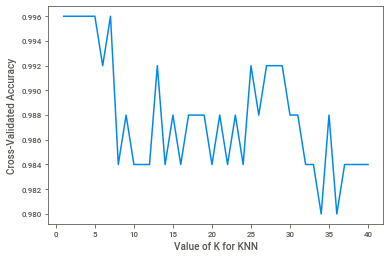

In [64]:
import matplotlib.pyplot as plt 
%matplotlib inline
k_range = range(1, 41)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,x, y, cv=5)
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# AutoML models (autokeras)

In [65]:
pip install autokeras

In [68]:
import autokeras as ak


In [69]:
clf=ak.StructuredDataClassifier(overwrite=True,max_trials=3)

In [70]:
clf.fit(x_train,y_train,epochs=10)

Trial 3 Complete [00h 00m 04s]
val_accuracy: 0.800000011920929

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 00m 12s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
6/6 [==============================] - 1s 4ms/step - loss: 0.6216 - accuracy: 0.7529
Epoch 2/10
6/6 [==============================] - 0s 3ms/step - loss: 0.5640 - accuracy: 0.8706
Epoch 3/10
6/6 [==============================] - 0s 3ms/step - loss: 0.5123 - accuracy: 0.9176
Epoch 4/10
6/6 [==============================] - 0s 3ms/step - loss: 0.4640 - accuracy: 0.9471
Epoch 5/10
6/6 [==============================] - 0s 3ms/step - loss: 0.4177 - accuracy: 0.9529
Epoch 6/10
6/6 [==============================] - 0s 3ms/step - loss: 0.3728 - accuracy: 0.9647
Epoch 7/10
6/6 [==============================] - 0s 3ms/step - loss: 0.3298 - accuracy: 0.9765
Epoch 8/10
6/6 [==============================] - 0s 3ms/step - loss: 0.2900 - accuracy: 0.9765
Epoch 9/10
6/6 [==============================] - 0s 2ms/step - loss

In [71]:
predicted_y=clf.predict(x_test)
print(clf.evaluate(x_test, y_test))

3/3 [==============================] - 0s 4ms/step - loss: 0.1907 - accuracy: 0.9875
[0.1906779557466507, 0.987500011920929]


# AutoML models(pycaret)

In [73]:
#check google colaboratory for pycaret model 

# AutoML models(tpot)

In [74]:
pip install tpot

In [75]:
from tpot import TPOTClassifier

In [76]:
tpot=TPOTClassifier(verbosity=2,max_time_mins=5)
tpot.fit(x_train,y_train)
print(tpot.score(x_test,y_test))

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 1.0

Generation 2 - Current best internal CV score: 1.0

Generation 3 - Current best internal CV score: 1.0

5.01 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.5, min_samples_leaf=12, min_samples_split=3, n_estimators=100)
1.0


In [77]:
tpot.fitted_pipeline_

Pipeline(steps=[('extratreesclassifier',
                 ExtraTreesClassifier(bootstrap=True, criterion='entropy',
                                      max_features=0.5, min_samples_leaf=12,
                                      min_samples_split=3))])

In [78]:
print(tpot.score(x_test,y_test))

1.0


In [79]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(n_estimators=135,random_state=4)

In [80]:
clf.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=135, random_state=4)

In [81]:
clf.predict([[0,0,0,0,1,0]])

array([1])